## Gradients
Understanding gradients will allow us to eventually understand edge detection which we will use later on, since its an important aspect of object detection in general.

An image gradient is a directional change in the intensity or color in an image.

* We will cover:

    Basic Sobel-Feldman Operators(Often called Sobel for short)
    
    Laplacian 

Normalized x-gradient only show vertical images.

y-gradient only show horizontal edges of images.

The Operator uses two 3x3 kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes and one for vertical.



In [1]:
# Import all the tools 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Import image
def load_img():
    img=cv2.imread("sudoku.jpg",0)
    return img
    

In [18]:
def show_img(img):
    fig=plt.figure(figsize=(10,15))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

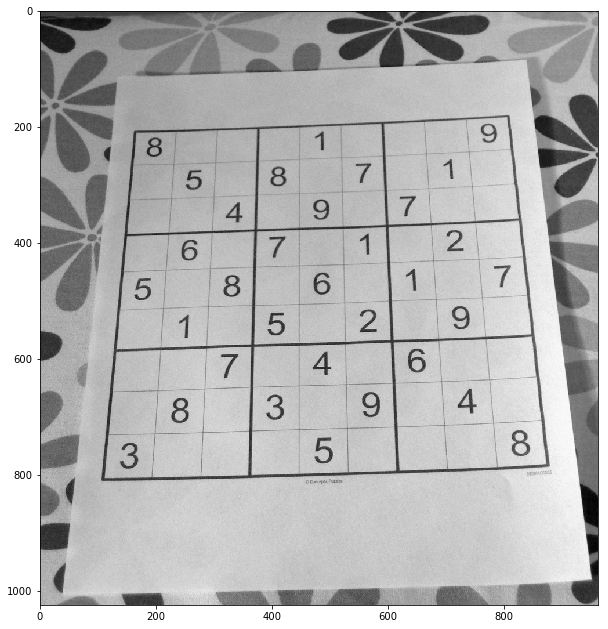

In [19]:
img=load_img()
show_img(img)

In [26]:
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # cv2.cv_64F use to detect both edges, x gradient=1, ygradient=0,kernel size=5x5
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # xgradient=0, ygradient=1
laplacian=cv2.Laplacian(img,cv2.CV_64F)

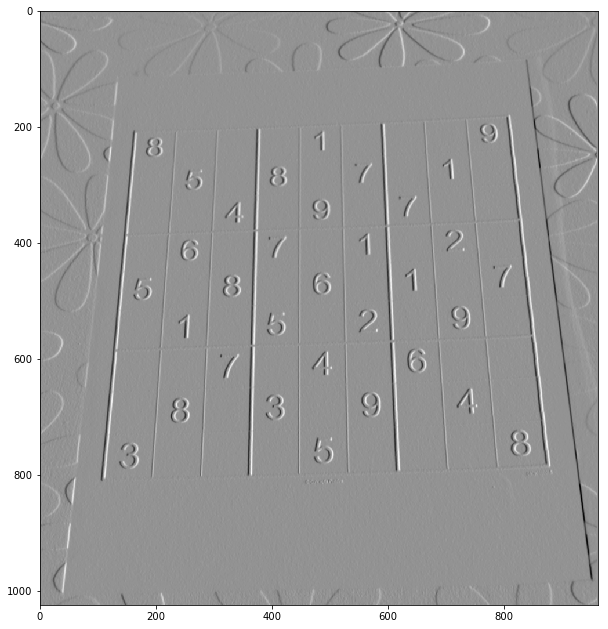

In [27]:
show_img(sobelx) # Only vertical images are visible 

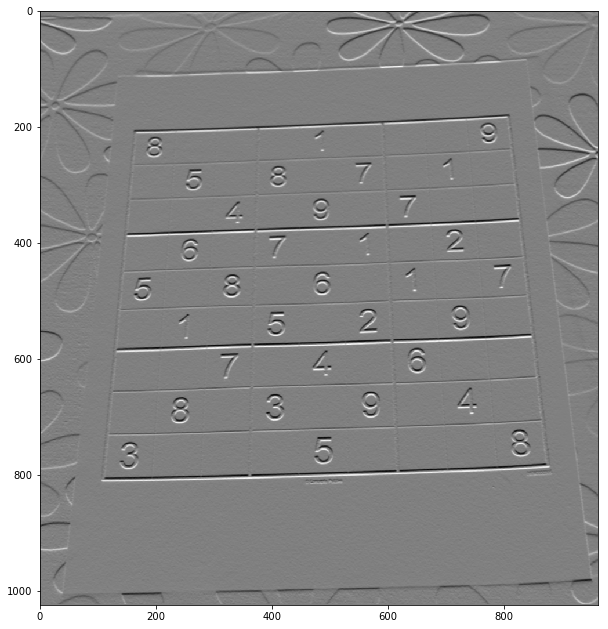

In [28]:
show_img(sobely)  # Only horizontal images are visible

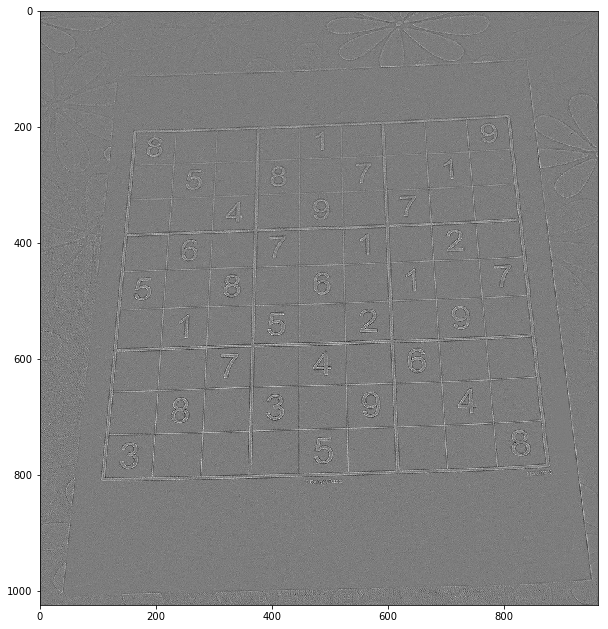

In [29]:
show_img(laplacian)  # both edges are visible

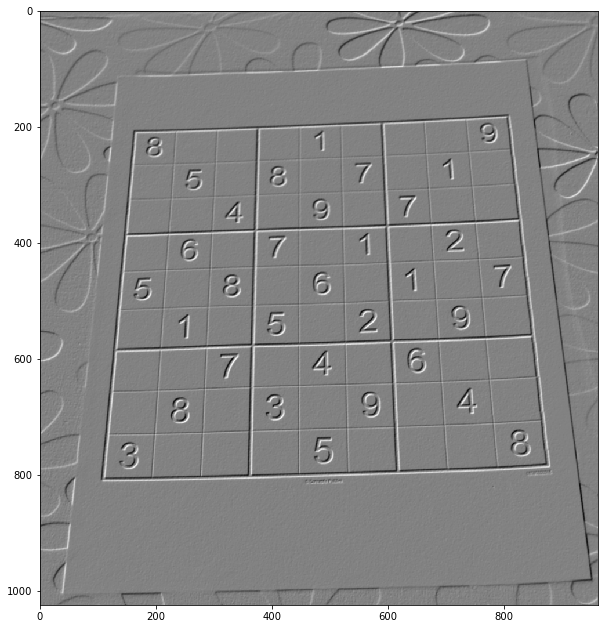

In [31]:
## Blend both sobelx and sobely
blended=cv2.addWeighted(src1=sobelx,alpha=0.7,src2=sobely,beta=0.7,gamma=1)
show_img(blended)

### Morphological Operations on blended images

In [47]:
kernel=np.ones((3,3),np.uint8)
morph=cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

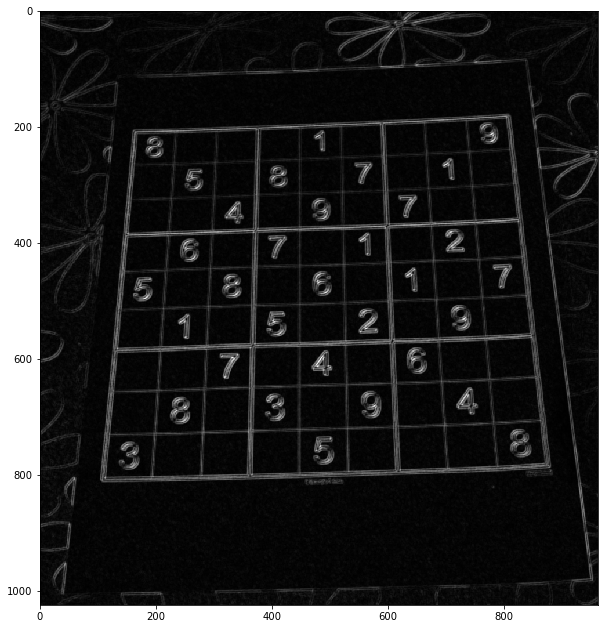

In [48]:
show_img(morph)

### Thresholding

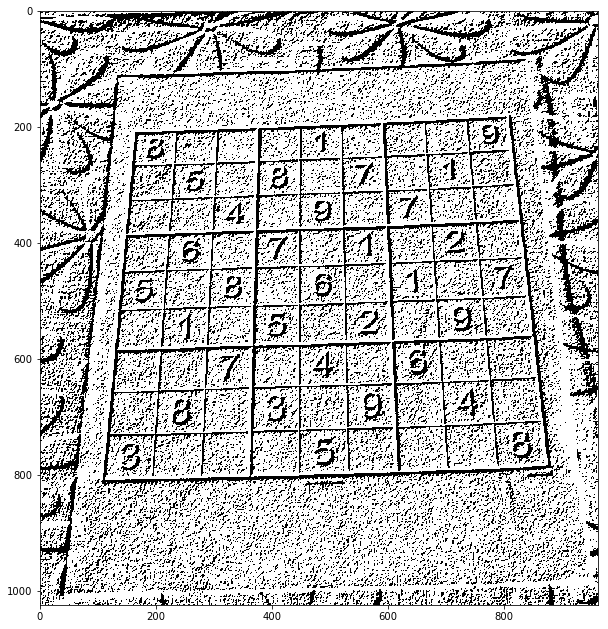

In [40]:
ret,th1=cv2.threshold(blended,100,255,cv2.THRESH_BINARY_INV)
show_img(th1)

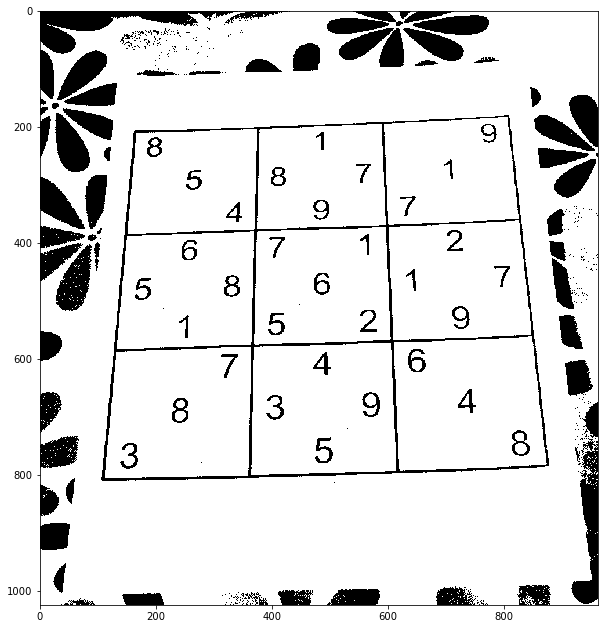

In [41]:
ret,th2=cv2.threshold(img,120,255,cv2.THRESH_BINARY)
show_img(th2)

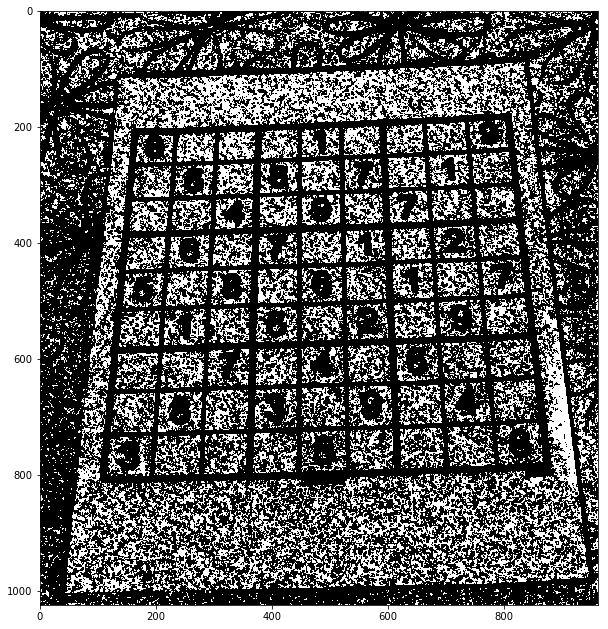

In [49]:
ret,th3=cv2.threshold(morph,200,255,cv2.THRESH_BINARY_INV)
show_img(th3)